Discussion about the outliers and impact on Machine Learning

should we remove the outliers when sale forcasting and you see spikes?
## 
we have to keep these spikes in sales 

#### which machine learning models are sensitive ot outliers?
1. Naive Bayes Classifier?  -------Not sensitive
2. SVM                      -------Not semsitive ( robust)
3. Linear Regession         ------ Sensitive 
4. Logistic Regression     ------  Sensitive 
5. Decision tree regressor or classifier    --- Not sensitive
6. Ensemble ( random forest, XGboost, GB)   --- Not sensitive
7.  KNN                                     ---- Not sensitive
8.  Kmeans clustering (Unsuppervised)       ---- Sensitive
9.  Hierarichal (Unsuppervised)             ---- Sensitive       
10.  PCA                                    ---- Sensitive 
11.  Neural Networks                        ---  Sensitive
12.  DBSCAN ( Unsuppervised)               ---   Sensitive 

In [6]:
  import pandas as pd

In [9]:
df= pd.read_csv('train.csv')


In [10]:
df['Age'].isnull().sum()

177

In [11]:
import seaborn as sns

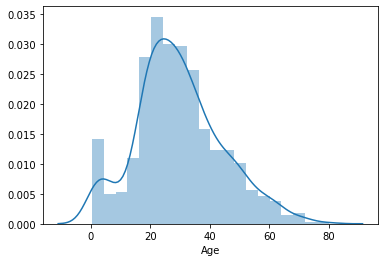

In [12]:
sns.distplot(df["Age"].dropna())

whenever we have normal distribution like above at that time the technique that we will be using is called as
ESTIMATE OUTLIERS , or Extreme Value Analysis. and we appply differerent formula to find IQR(mean+3*std).

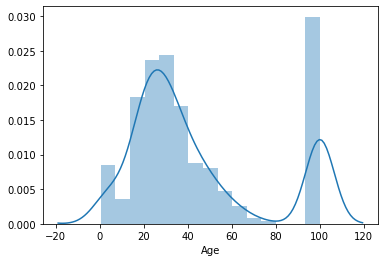

In [13]:
sns.distplot(df["Age"].fillna(100))

Text(0, 0.5, 'No of passengers')

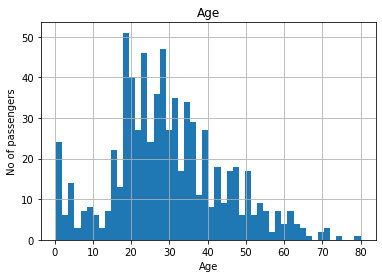

In [17]:
figure=df.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passengers')

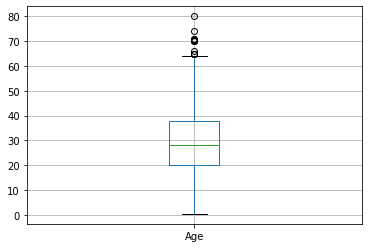

In [18]:
df.boxplot(column='Age')

In [19]:
df["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [20]:
#### assuming that Age follows a Gaussian distribution we will calculate the boundaries which differentiates
#### the outliers

In [23]:
upper_boundary=df['Age'].mean()+ 3*df['Age'].std()
lower_boundary=df['Age'].mean()- 3*df['Age'].std()
print (lower_boundary), print(upper_boundary), print(df['Age'].mean())

-13.88037434994331
73.27860964406095
29.69911764705882


(None, None, None)

#### for data not following Guassian distribution

we have to do this for 'Fare' which is not Guassian

In [25]:
IQR= df.Age.quantile(0.75)-df.Age.quantile(0.25)

In [26]:
IQR

17.875

In [30]:
lower_bridge= df.Age.quantile(0.25)-(IQR*1.5)
upper_bridge= df['Age'].quantile(0.75)+ (IQR*1.5)
print (lower_bridge), print(upper_bridge)

-6.6875
64.8125


(None, None)

#### if we want to go with extreme outliers

In [29]:
lower_bridge= df['Age'].quantile(0.25)-(IQR*3)
upper_bridge= df['Age'].quantile(0.75)+ (IQR*3)
print (lower_bridge), print(upper_bridge)

-33.5
91.625


(None, None)

### in cases if features are Skewed

Text(0, 0.5, 'No of passengers')

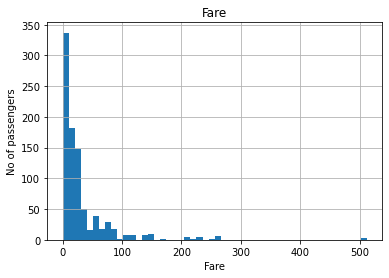

In [33]:
figure=df.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passengers')

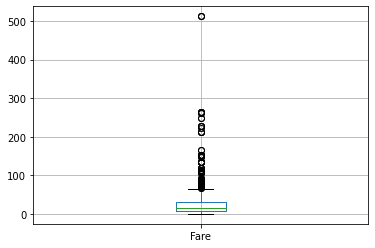

In [34]:
df.boxplot(column='Fare')

In [35]:
df['Fare'].describe

<bound method NDFrame.describe of 0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64>

In [36]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [38]:
IQR= df.Fare.quantile(0.75)-df.Fare.quantile(0.25)

In [39]:
lower_bridge= df.Fare.quantile(0.25)-(IQR*1.5)
upper_bridge= df['Fare'].quantile(0.75)+ (IQR*1.5)
print (lower_bridge), print(upper_bridge)

-26.724
65.6344


(None, None)

In [41]:
lower_bridge= df['Fare'].quantile(0.25)-(IQR*3)
upper_bridge= df['Fare'].quantile(0.75)+ (IQR*3)
print (lower_bridge), print(upper_bridge)

-61.358399999999996
100.2688


(None, None)